# Lesson 1  Homework - Where's your city?

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

## Looking at the data

In [3]:
torch.cuda.set_device(0)

In [4]:
path = Path('/home/henripal/projects/maps/scraper/')

In [5]:
path.ls()

['scraper', 'img', 'data']

In [6]:
path_img = path/'img'

In [7]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/henripal/projects/maps/scraper/img/Palembang,+Indonesia1.png'),
 PosixPath('/home/henripal/projects/maps/scraper/img/San+Miguel+de+Tucumán,+Argentina1.png'),
 PosixPath('/home/henripal/projects/maps/scraper/img/Dengfeng,+China0.png'),
 PosixPath('/home/henripal/projects/maps/scraper/img/Calgary,+Canada2.png'),
 PosixPath('/home/henripal/projects/maps/scraper/img/Philadelphia+(PA),+United+States3.png')]

In [8]:
np.random.seed(3)
pat = r',+([A-z_+-ô\'\(\)]+)\d+.png$'

In [9]:
for fname in fnames:
    found = re.findall(pat, fname.as_posix())
    if len(found) == 0:
        print(fname.as_posix())
        break

In [10]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

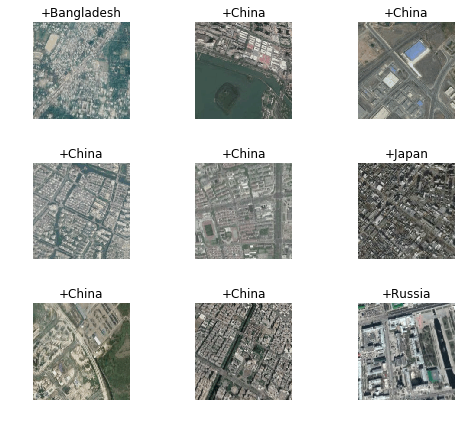

In [11]:
data.show_batch(rows=3, figsize=(7,6))

In [12]:
print(data.classes)
len(data.classes),data.c

['+Indonesia', '+Argentina', '+China', '+Canada', '+United+States', '+Japan', '+Syria', '+Malaysia', '+Brazil', '+Myanmar', '+Turkey', '+India', '+Ukraine', '+Iran', '+Mexico', '+Egypt', '+Saudi+Arabia', '+Ghana', '+Belarus', '+China+-+Hong+Kong', '+South+Korea', '+Colombia', '+Morocco', '+Philippines', '+South+Africa', '+Germany', '+United+Kingdom', '+Italy', '+Peru', '+Nepal', '+Sudan', '+Chile', '+Venezuela', '+Pakistan', '+Jordan', '+Sweden', '+Serbia', '+Thailand', '+Spain', '+Mali', '+Niger', '+Libya', '+Russia', '+Zambia', '+Nigeria', '+Guatemala', '+Georgia', '+Laos', '+Viet+Nam', '+Bangladesh', '+Czech+Republic', '+Belgium', '+Norway', '+Bulgaria', '+North+Korea', '+Angola', '+Australia', '+Romania', '+Algeria', '+Kenya', '+Cameroon', '+Poland', '+Uruguay', '+Dominican+Republic', '+Netherlands', "+Côte+d'Ivoire", '+Senegal', '+Jamaica', '+Somalia', '+United+Arab+Emirates', '+Ireland', '+Bolivia', '+Benin', '+Taiwan+(China+ROC)', '+Ecuador', '+Azerbaijan', '+Honduras', '+Tanzan

(118, 118)

## Training: resnet34

In [13]:
learn = ConvLearner(data, models.resnet34, metrics=error_rate)

In [14]:
learn.fit_one_cycle(4)

Total time: 00:29
epoch  train loss  valid loss  error_rate
1      3.695444    2.364078    0.460811    (00:08)
2      2.351217    1.505159    0.358108    (00:07)
3      1.667906    1.328095    0.325676    (00:07)
4      1.299108    1.286323    0.327027    (00:07)



In [15]:
learn.fit_one_cycle(4)

Total time: 00:29
epoch  train loss  valid loss  error_rate
1      1.104772    1.185930    0.300000    (00:07)
2      1.031349    1.058445    0.286486    (00:07)
3      0.868635    0.911615    0.262162    (00:07)
4      0.729046    0.878821    0.243243    (00:07)



In [16]:
learn.fit_one_cycle(4)

Total time: 00:29
epoch  train loss  valid loss  error_rate
1      0.640335    0.903110    0.243243    (00:07)
2      0.659793    0.841174    0.237838    (00:07)
3      0.576363    0.704270    0.209459    (00:07)
4      0.481309    0.682353    0.200000    (00:07)



In [17]:
learn.fit_one_cycle(4)

Total time: 00:29
epoch  train loss  valid loss  error_rate
1      0.442200    0.670365    0.193243    (00:07)
2      0.473031    0.720177    0.206757    (00:07)
3      0.421809    0.600794    0.177027    (00:07)
4      0.365016    0.594458    0.177027    (00:07)



In [18]:
learn.fit_one_cycle(4)

Total time: 00:29
epoch  train loss  valid loss  error_rate
1      0.337580    0.593194    0.164865    (00:07)
2      0.375117    0.651619    0.179730    (00:07)
3      0.334217    0.574616    0.166216    (00:07)
4      0.280905    0.536241    0.158108    (00:07)



In [19]:
learn.fit_one_cycle(4)

Total time: 00:29
epoch  train loss  valid loss  error_rate
1      0.272620    0.590267    0.168919    (00:07)
2      0.313904    0.541689    0.159459    (00:07)
3      0.295073    0.544954    0.162162    (00:07)
4      0.247581    0.517643    0.144595    (00:07)



In [20]:
learn.fit_one_cycle(4)

Total time: 00:29
epoch  train loss  valid loss  error_rate
1      0.212915    0.577610    0.167568    (00:07)
2      0.258838    0.608416    0.170270    (00:07)
3      0.271946    0.552747    0.156757    (00:07)
4      0.210060    0.543233    0.151351    (00:07)



In [21]:
learn.save('stage-1')

## Results

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

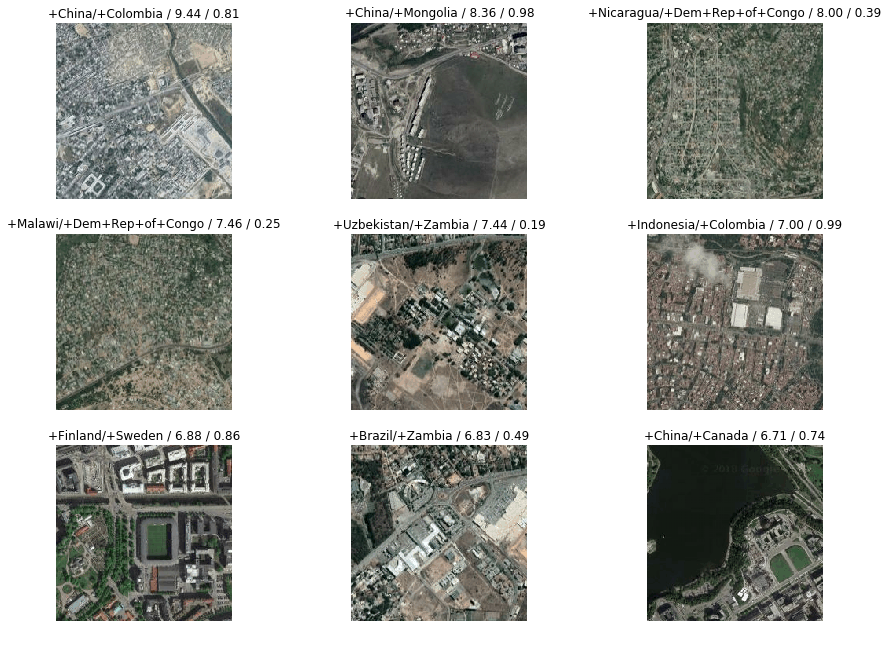

In [52]:
interp.plot_top_losses(9, figsize=(15,11))

In [24]:
interp.most_confused(min_val=2)

[('+Pakistan', '+India', 6),
 ('+Colombia', '+China', 3),
 ('+Russia', '+China', 3),
 ('+Viet+Nam', '+India', 3),
 ('+Poland', '+Germany', 3)]

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [25]:
learn.unfreeze()

In [26]:
learn.fit_one_cycle(1)

Total time: 00:09
epoch  train loss  valid loss  error_rate
1      1.677303    1.760953    0.410811    (00:09)



In [44]:
learn.load('stage-1')

In [28]:
learn.lr_find()

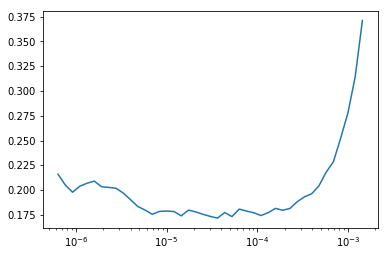

In [29]:
learn.recorder.plot()

In [46]:
learn.unfreeze()
learn.fit_one_cycle(16, max_lr=slice(1e-6,1e-5))

Total time: 02:23
epoch  train loss  valid loss  error_rate
1      0.149076    0.500560    0.140541    (00:08)
2      0.163105    0.489072    0.132432    (00:09)
3      0.157873    0.494975    0.141892    (00:08)
4      0.147226    0.486400    0.137838    (00:08)
5      0.151567    0.487170    0.135135    (00:08)
6      0.150518    0.490125    0.141892    (00:08)
7      0.139647    0.470427    0.132432    (00:08)
8      0.134102    0.477111    0.136486    (00:08)
9      0.138462    0.474825    0.137838    (00:08)
10     0.125446    0.474083    0.131081    (00:09)
11     0.130586    0.467971    0.129730    (00:08)
12     0.133564    0.472727    0.135135    (00:08)
13     0.128727    0.471509    0.132432    (00:09)
14     0.125140    0.471240    0.133784    (00:08)
15     0.127606    0.476382    0.136486    (00:08)
16     0.129058    0.471807    0.132432    (00:08)



In [47]:
learn.save('finetuned_cities')

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. Later in the course you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here.

In [31]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=299, bs=32)
data.normalize(imagenet_stats)

In [15]:
learn = ConvLearner(data, models.resnet50, metrics=error_rate)

In [32]:
learn.fit_one_cycle(1)

Total time: 00:08
epoch  train loss  valid loss  error_rate
1      1.735425    1.729215    0.417568    (00:08)



In [33]:
learn.fit_one_cycle(4)

Total time: 00:35
epoch  train loss  valid loss  error_rate
1      1.347913    2.171234    0.456757    (00:08)
2      1.325388    1.547163    0.378378    (00:08)
3      1.014723    0.866912    0.241892    (00:08)
4      0.683112    0.660132    0.198649    (00:08)



In [34]:
learn.fit_one_cycle(4)

Total time: 00:35
epoch  train loss  valid loss  error_rate
1      0.609655    1.837975    0.391892    (00:08)
2      0.897205    1.092242    0.291892    (00:09)
3      0.761523    0.800895    0.216216    (00:08)
4      0.510550    0.529895    0.162162    (00:09)



In [35]:
learn.fit_one_cycle(4)

Total time: 00:35
epoch  train loss  valid loss  error_rate
1      0.409014    1.173710    0.301351    (00:08)
2      0.680406    1.339851    0.336486    (00:08)
3      0.601585    0.761306    0.210811    (00:08)
4      0.415343    0.520669    0.145946    (00:08)



In [36]:
learn.fit_one_cycle(4)

Total time: 00:35
epoch  train loss  valid loss  error_rate
1      0.333654    0.863849    0.227027    (00:08)
2      0.633169    1.386115    0.337838    (00:08)
3      0.554616    0.631848    0.178378    (00:08)
4      0.364314    0.491776    0.148649    (00:08)



In [37]:
learn.save('stage-1-50')

In [38]:
learn.lr_find()

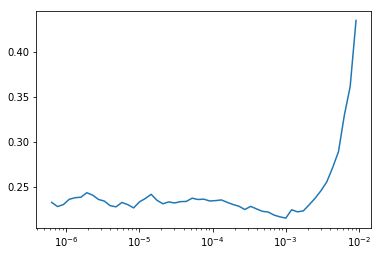

In [39]:
learn.recorder.plot()

It's astonishing that it's possible to recognize pet breeds so accurately! Let's see if full fine-tuning helps:

In [40]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-4))

Total time: 00:09
epoch  train loss  valid loss  error_rate
1      0.219618    0.490654    0.147297    (00:09)



In [41]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

Total time: 00:17
epoch  train loss  valid loss  error_rate
1      0.208213    0.510180    0.154054    (00:08)
2      0.220749    0.489816    0.148649    (00:08)



In this case it doesn't, so let's go back to our previous model.

In [ ]:
learn.load('stage-1-50')

In [48]:
interp = ClassificationInterpretation.from_learner(learn)

In [51]:
interp.most_confused(min_val=1)

[('+Pakistan', '+India', 5),
 ('+Poland', '+Germany', 3),
 ('+China', '+Brazil', 2),
 ('+Mexico', '+Saudi+Arabia', 2),
 ('+Colombia', '+Indonesia', 2),
 ('+Colombia', '+China', 2),
 ('+Germany', '+China', 2),
 ('+Germany', '+United+Kingdom', 2),
 ('+Chile', '+Mexico', 2),
 ('+Sweden', '+China', 2),
 ('+Russia', '+China', 2),
 ('+Viet+Nam', '+Indonesia', 2),
 ('+Zimbabwe', '+Mali', 2),
 ('+Kyrgyzstan', '+Ukraine', 2)]